---
---
# Introducción al aprendizaje supervisado: clasificación

En este primer apartado, veremos unas cuantas cuestiones relativas a los problemas predictivos de clasificación, y conoceremos los principales algoritmos que podemos aplicar en este sentido y sus propiedades.



En términos generales, un problema de aprendizaje supervisado se dice que es de **clasificación** cuando la variable respuesta es discreta; i.e., toma un número finito de valores. En el caso más simple, que abordaremos inicialmente, se trata de problemas en los que la variable respuesta es un operador booleano y tenemos que distinguir entre dos clases, como por ejemplo cuando:


*   Queremos distinguir entre fotos de hombres y de mujeres.
*   Queremos decidir cuándo un email es *spam* o no.

Supongamos que nos encontramos en el último de los casos, y tenemos la siguiente variable respuesta, etiquetada con 0 cuando el email no es *spam*, y con 1 cuando sí lo es:



In [1]:
import numpy as np
y_true = np.array([0,1,1,0,0,1,0,0])

Además, por uno de los métodos que estudiaremos más adelante, hemos obtenido las siguientes predicciones:

In [2]:
y_pred = np.array([0,1,0,0,0,1,1,0])

Podemos distinguir cuatro situaciones:

*   Que el valor real sea 0 (no *spam*) y el valor predicho sea también 0 (conocido como *true negative*).
*   Que el valor real sea 0 (no *spam*) y el valor predicho sea 1 (conocido como *false positive* o **error tipo I**).
*   Que el valor real sea 1 (*spam*) y el valor predicho sea 0 (conocido como *false negative* o **error tipo II**).
*   Que el valor real sea 1 (*spam*) y el valor predicho sea también 1 (conocido como *true positive*).

Estos cuatro casos componen lo que se conoce como **matriz de confusión**, y se representa del siguiente modo:

In [58]:
#Escribimos primero los vectores lógicos para que quede más claro
TP_condition = (y_true==1) & (y_pred==1)
FP_condition = (y_true==0) & (y_pred==1)
FN_condition = (y_true==1) & (y_pred==0)
TN_condition = (y_true==0) & (y_pred==0)

#Obtenemos ahora la suma de todos los casos anteriores
TP = len(y_true[TP_condition])
FP = len(y_true[FP_condition])
FN = len(y_true[FN_condition])
TN = len(y_true[TN_condition])

#Calculamos la matriz de confusión
confusion_matrix = np.array([[TP,FP],[FN,TN]])
print(confusion_matrix)

[[2 1]
 [1 4]]


Podemos ahora definir una serie de métricas para medir la calidad de la predicción:

*   *Accuracy*: En términos generales, podríamos decir que hemos acertado 6 de 8 predicciones, luego tendríamos una tasa de acierto del 75%. Sin embargo, esto no tiene en cuenta cuántas predicciones se hacen de cada clase, lo que motiva los siguientes conceptos.
*   *Precision*: Evaluamos únivamente los casos positivos. En este caso, hemos acertado dos de tres casos positivos, por lo que tenemos una *precision* del 66.67%.
*   *Recall*: Evaluamos únicamente los casos negativos. En este caso, hemos acertado cuatro de cinco casos positivos, luego tenemos un *recall* del 80%.
*   *F1-score*: Tiene en cuenta las dos últimas cantidades, y se calcula como 2·(recall·precision)/(recall + precision). En este caso, sería del 72.73%.

Todo ello puede ser obtenido de manera directa con el siguiente método:

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.67      0.67      0.67         3

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8



In [60]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true,y_pred))

[[4 1]
 [1 2]]


Pero, ¿qué pasa cuando nuestro conjunto de datos posee más de dos etiquetas? En tal caso, para usar todo lo anterior, recurrimos a la técnica *One vs Rest*, en la que consideramos para cada etiqueta, el caso "0" como dicha etiqueta, y el caso "1" el resto de etiquetas. Por ejemplo:

In [61]:
y_true = np.array([0,1,4,3,2,1,4,1,3,1,1,1,0,2])
y_pred = np.array([0,1,4,3,2,1,1,1,3,1,1,4,0,3])
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.83      0.83      0.83         6
           2       1.00      0.50      0.67         2
           3       0.67      1.00      0.80         2
           4       0.50      0.50      0.50         2

    accuracy                           0.79        14
   macro avg       0.80      0.77      0.76        14
weighted avg       0.81      0.79      0.78        14

[[2 0 0 0 0]
 [0 5 0 0 1]
 [0 0 1 1 0]
 [0 0 0 2 0]
 [0 1 0 0 1]]


Finalmente, de cara a preparar y entrenar modelos, cuando dispongamos de un cierto *dataset*, dividiremos nuestros datos en dos compopnentes:

*   Datos de entrenamiento.
*   Datos test.

Los últimos nos permitirán valorar y juzgar si el entrenamiento de los datos ha sido adecuado o no. Para ello, es importante tener en consideración las siguientes cuestiones, sobre las cuales profundizaremos más adelante:

*   Ratio de división.
*   Balanceamiento de datos.
*   En el caso de clasificación, número de elementos de cada clase en ambos datos.

---
---
# Ejemplo: Breast cancer dataset

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

In [4]:
#Dividimos los datos en datos de entrenamiento y datos de validación
X, y = datasets.load_breast_cancer().data, datasets.load_breast_cancer().target
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = .25)

In [5]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
pd.DataFrame(X).shape

(569, 30)

In [11]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [7]:
help(datasets.load_breast_cancer)

Help on function load_breast_cancer in module sklearn.datasets._base:

load_breast_cancer(*, return_X_y=False, as_frame=False)
    Load and return the breast cancer wisconsin dataset (classification).
    
    The breast cancer dataset is a classic and very easy binary classification
    dataset.
    
    =================   ==============
    Classes                          2
    Samples per class    212(M),357(B)
    Samples total                  569
    Dimensionality                  30
    Features            real, positive
    =================   ==============
    
    The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is
    downloaded from:
    https://goo.gl/U2Uwz2
    
    Read more in the :ref:`User Guide <breast_cancer_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
       

---
---
# Algoritmos

A continuación exponemos algunos de los algoritmos más populares en este área, y los iremos probando con el *dataset* introducido anteriormente:

---
## Modelo logístico

Es quizás el más elemental de todos, y se usa en circunstancias en las que se trata de predecir una variable respuesta binaria, como por ejemplo:

* Si un email es spam o no.
* Si un tumor es benigno o maligno.

Estos modelos pueden ser vistos como un caso particular del modelo lineal generalizado, donde la variable respuesta sigue una variable Bernouilli. También puede aplicarse a problemas donde la variable respuesta tenga múltiples opciones, aplicando la técnica *One vs Rest*. 

Para separar ambos niveles, este modelo utiliza la conocida **función sigmoide**, que viene definida como $\sigma(z)=\frac{1}{1-e^{-z}}$. Esta función es la que indicaría la probabilidad del suceso en la distribución de Bernouilli:

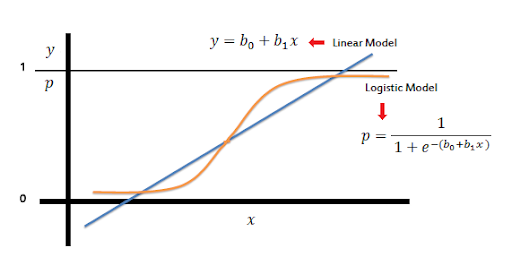

Como ya hemos adelantado, partimos de la hipótesis de que queremos modelizar

$$h_{\theta}(x)=\sigma(\theta^T\cdot x),$$

donde $\theta\in\mathcal{M}(n_{features},1)$ y $h_{\theta}(z)\in\mathcal{B}(p)$. Para estimar los valores de los parámetros $\theta$, introduciremos el **método de descenso gradiente**, que consiste en los pasos:

1. *Forward propagation*: Evaluamos los datos de entrada $X\in\mathcal{M}(n_{samples}, n_{features})$ con la función $h_{\theta}$: $$h_{\theta}(X)=\sigma(X\cdot \theta)$$
2. Calculamos la **función de pérdida**: Si consideramos $y\in\mathcal{M}(n_{features},1)$ las etiquetas originales de los datos, $$ J(\theta)=-\frac{1}{n_{samples}}\left[y^T\cdot\log{(h_{\theta}(X))}+(1-y^T)\cdot\log{(1-h_{\theta}(X))}\right] $$

  Obsérvese que el signo menos hace que esta función sea positiva, ya que en ambos casos el logaritmo es negativo.

3. *Backpropagation*: De cara a minimizar el valor de este función, calculamos el **gradiente** de dicha función:
$$ \frac{\partial J}{\partial \theta_j}=\frac{1}{n_{samples}}X^T(h_{\theta}(X)-y) $$

4. Aplicamos la corrección de los parámetros mediante el gradiente y un cierto **factor de aprendizaje** $\alpha$:
$$\theta_j\mapsto \theta_j-\alpha\frac{\partial J}{\partial \theta_j}$$

Este proceso se podrá repetir durante una serie de iteraciones, conocidas como **epochs**. Realicemos en primer lugar una implementación manual del mismo, en la que además tendremos en cuenta la posible existencia de un **bias**:

In [67]:
#Creamos una clase que recoja todos los métodos necesarios
class LogisticRegression():
    def __init__(self, alpha=0.01, epochs=1000, fit_intercept=True, verbose=False):
        self.alpha = alpha
        self.epochs = epochs
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        # Inicialización de los pesos
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.epochs):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.alpha * gradient
            
            if((self.verbose == True) & (i % 10000 == 0)):
                z = np.dot(X, self.theta)
                h = self.sigmoid(z)
                print(f'loss: {self.loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)
    
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [68]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,15.000,15.51,97.45,684.5,0.08371,0.10960,0.065050,0.03780,0.1881,0.05907,...,16.410,19.31,114.20,808.2,0.11360,0.36270,0.34020,0.13790,0.2954,0.08362
1,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.03029,0.1945,0.06322,...,10.760,26.83,72.22,361.2,0.15590,0.23020,0.26440,0.09749,0.2622,0.08490
2,12.450,16.41,82.85,476.7,0.09514,0.15110,0.154400,0.04846,0.2082,0.07325,...,13.780,21.03,97.82,580.6,0.11750,0.40610,0.48960,0.13420,0.3231,0.10340
3,17.300,17.08,113.00,928.2,0.10080,0.10410,0.126600,0.08353,0.1813,0.05613,...,19.850,25.09,130.90,1222.0,0.14160,0.24050,0.33780,0.18570,0.3138,0.08113
4,10.910,12.35,69.14,363.7,0.08518,0.04721,0.012360,0.01369,0.1449,0.06031,...,11.370,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,17.080,27.15,111.20,930.9,0.09898,0.11100,0.100700,0.06431,0.1793,0.06281,...,22.960,34.49,152.10,1648.0,0.16000,0.24440,0.26390,0.15550,0.3010,0.09060
422,10.440,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,0.1788,0.06450,...,11.520,19.80,73.47,395.4,0.13410,0.11530,0.02639,0.04464,0.2615,0.08269
423,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.119300,0.09667,0.1741,0.05176,...,22.030,17.81,146.60,1495.0,0.11240,0.20160,0.22640,0.17770,0.2443,0.06251
424,9.720,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.00000,0.1653,0.06447,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


In [69]:
pd.DataFrame(y_train)

,0
0,1
1,1
2,1
3,0
4,1
...,...
421,0
422,1
423,0
424,1


In [70]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,14.470,24.99,95.81,656.4,0.08837,0.12300,0.10090,0.03890,0.1872,0.06341,...,16.220,31.73,113.50,808.9,0.13400,0.42020,0.4040,0.12050,0.3187,0.10230
1,14.960,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,16.250,26.19,109.10,809.8,0.13130,0.30300,0.1804,0.14890,0.2962,0.08472
2,15.730,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,0.06259,...,17.010,14.20,112.50,854.3,0.15410,0.29790,0.4004,0.14520,0.2557,0.08181
3,12.070,13.44,77.83,445.2,0.11000,0.09009,0.03781,0.02798,0.1657,0.06608,...,13.450,15.77,86.92,549.9,0.15210,0.16320,0.1622,0.07393,0.2781,0.08052
4,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,...,9.628,19.62,64.48,284.4,0.17240,0.23640,0.2456,0.10500,0.2926,0.10170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,10.660,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.00000,0.1928,0.05975,...,11.540,19.20,73.20,408.3,0.10760,0.06791,0.0000,0.00000,0.2710,0.06164
139,19.680,21.68,129.90,1194.0,0.09797,0.13390,0.18630,0.11030,0.2082,0.05715,...,22.750,34.66,157.60,1540.0,0.12180,0.34580,0.4734,0.22550,0.4045,0.07918
140,11.290,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,...,12.320,16.18,78.27,457.5,0.13580,0.15070,0.1275,0.08750,0.2733,0.08022
141,11.680,16.17,75.49,420.5,0.11280,0.09263,0.04279,0.03132,0.1853,0.06401,...,13.320,21.59,86.57,549.8,0.15260,0.14770,0.1490,0.09815,0.2804,0.08024


In [71]:
pd.DataFrame(y_pred)

,0
0,0
1,1
2,4
3,3
4,2
5,1
6,1
7,1
8,3
9,1


In [72]:
#Instanciamos el modelo
model = LogisticRegression(alpha=0.1, epochs=1000)
#Entrenamos en los datos
model.fit(X_train, y_train)
#Predecimos
y_pred = model.predict(X_test)
# Classification report
print(classification_report(y_test, y_pred))

C:\Users\User\AppData\Local\Temp\ipykernel_2112\3763041360.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


              precision    recall  f1-score   support

           0       0.95      0.81      0.87        47
           1       0.91      0.98      0.94        96

    accuracy                           0.92       143
   macro avg       0.93      0.89      0.91       143
weighted avg       0.92      0.92      0.92       143



Usando la librería **sklearn**, tenemos una implementación completa del mismo. Recomendamos visitar la documentación para tener información extensa sobre los hiperparámetros de la implementación:

In [73]:
from sklearn.linear_model import LogisticRegression
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        47
           1       0.95      0.97      0.96        96

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



---
## K-Nearest Neighbours

Este algoritmo también es muy simple de implementar y, en algunos casos, también es muy efectivo. Intuitivamente, consiste en estudiar el comportamiento de los *K* vecinos de cada punto para determinar puntos nuevos. Su funcionamiento es el siguiente:


1.   Cargamos nuestros datos etiquetados.
2.   Introducimos nuestro nuevo punto sin etiquetar con todas las *features* de los datos anteriores.
3.   Calculamos la distancia del nuevo punto a los puntos de los datos originales.
4.   Ordenamos la lista de forma ascendente.
5.   Seleccionamos los *K* primeros.
6.   Asignamos como etiqueta del valor nuevo la *moda* de los *K* puntos anteriores.


Nótese que este algoritmo puede ser muy sensible a la elección del parámetro *K*:

In [74]:
#Creamos una clase que recoja todos los métodos necesarios
class KNN():
    def __init__(self, n_neighbours):
        self.n_neighbours = n_neighbours

    def euclidean_distance(self, vec1, vec2):
      return np.sqrt(np.sum((vec1-vec2)**2, axis = -1))
      
    def predict(self, X_train, X_test, y_train):
      #Predecimos cada valor de los datos test
      y_pred = np.zeros(X_test.shape[0])
      for test_idx in np.arange(X_test.shape[0]):
        #Calculamos distancias
        distances = np.zeros(y_train.shape[0]) #Inicializamos un array para contener las distancias
        for i in np.arange(y_train.shape[0]):
          distances[i] = self.euclidean_distance(X_train[i,:], X_test[test_idx,:])
        #Obtenemos los índices de los k vecinos más próximos
        optimal_idx = np.argpartition(distances.reshape(-1), self.n_neighbours)[:self.n_neighbours]
        #Asignamos valor predicción
        y_pred[test_idx] = mode(y_train[optimal_idx])[0][0]
      return y_pred

In [75]:
from scipy.stats import mode
#Instanciamos modelo
kNN = KNN(3)
#Elaboramos predicciones
y_pred = kNN.predict(X_train, X_test, y_train)
# Classification report
print(classification_report(y_test, y_pred))

C:\Users\User\AppData\Local\Temp\ipykernel_2112\667464347.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred[test_idx] = mode(y_train[optimal_idx])[0][0]


              precision    recall  f1-score   support

           0       0.91      0.85      0.88        47
           1       0.93      0.96      0.94        96

    accuracy                           0.92       143
   macro avg       0.92      0.90      0.91       143
weighted avg       0.92      0.92      0.92       143



De nuevo, la librería *sklearn* nos ofrece ya una implementación de este método:

In [76]:
from sklearn.neighbors import KNeighborsClassifier
#Parámetros
weights = 'distance'
p = 2
n_neighbours = 5
#Modelo
clf = KNeighborsClassifier(n_neighbors = n_neighbours, weights = weights, p = p)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        47
           1       0.93      0.95      0.94        96

    accuracy                           0.92       143
   macro avg       0.91      0.90      0.90       143
weighted avg       0.92      0.92      0.92       143



---
## Naive Bayes

Este algoritmo se caracteriza por ser extremadamente rápido de computar, y sus aplicaciones se extienden a numerosos campos de la inteligencia artificial. Sin embargo, cuenta con un gran inconveniente (presente en la hipótesis del teorema de Bayes), y es que las *features* se asumen independientes, lo cual es muy poco frecuente en la vida real (aunque puede conseguirse mediante técnicas como *PCA*).

El teorema de Bayes nos da una forma de calcular probabilidades de eventos *a posteriori* conociendo la información *a priori*:

$$ P(c|x)=\frac{P(x|c) P(c)}{P(x)} $$

En términos relacionados a nuestro contexto, podría leerse como sigue: *la probabilidad de una determinada clase dada una serie de features, es igual al producto de la probabilidad de dichas features dada una clase, por la probabilidad de dicha clase y el inverso de las features*.

Para trabajar sobre este algoritmo, es preciso construir una tabla de frecuencias. Veremos a continuación un ejemplo sobre nuestros datos:



In [77]:
class NaiveBayesClassifier():
  
    def calc_prior(self, features, target):
        '''
        Método para calcular probabilidades a priori
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()
        return self.prior


    def calc_statistics(self, features, target):
        '''
        Calculamos media y varianza de cada columna
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var


    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed)
        we will assume that probability of specific target value given specific class is normally distributed 
        
        probability density function derived from wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob


    def calc_posterior(self, x):
        posteriors = []

        # Calculamos la probabiidad posterior de cada clase
        for i in range(self.count):
            prior = np.log(self.prior[i])
            conditional = np.sum(np.log(self.gaussian_density(i, x)))
            posterior = prior + conditional
            posteriors.append(posterior)
        # Devuelve clase con mayor probabilidad a posteriori
        return self.classes[np.argmax(posteriors)]


    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)


    def predict(self, features):
        y_pred = np.array([self.calc_posterior(f) for f in features.to_numpy()])
        return y_pred

**Advertencia**: En esta clase, es preciso tener los datos preparados como **pd.DataFrames**, ya que se hace uso de operaciones como `.groupby()`.

In [78]:
#Tratamos datos como pd.DataFrame
X = pd.DataFrame(datasets.load_breast_cancer().data, columns = datasets.load_breast_cancer().feature_names)
y = pd.Series(datasets.load_breast_cancer().target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)
#Instanciamos modelo
NBC = NaiveBayesClassifier()
#Entrenamos modelo
NBC.fit(X_train, y_train)
#Elaboramos predicciones y mostramos informe
y_pred = NBC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        54
           1       0.89      1.00      0.94        89

    accuracy                           0.92       143
   macro avg       0.95      0.90      0.91       143
weighted avg       0.93      0.92      0.92       143



c:\Users\User\Desktop\Data_Analytics\venv_Data_Analytics\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\User\AppData\Local\Temp\ipykernel_2112\13489554.py:43: RuntimeWarning: divide by zero encountered in log
  conditional = np.sum(np.log(self.gaussian_density(i, x)))


### Ejercicio
¿Existe algún método de SKLearn para implementar el algoritmo de Naive Bayes?

---
## Support Vector Machine

Esta técnica se basa en la idea de encontrar un hiperplano de soporte para separar nuestro conjunto de datos y maximice la distancia a ambos conjuntos. Gráficamente, se ilustra de la siguiente forma:

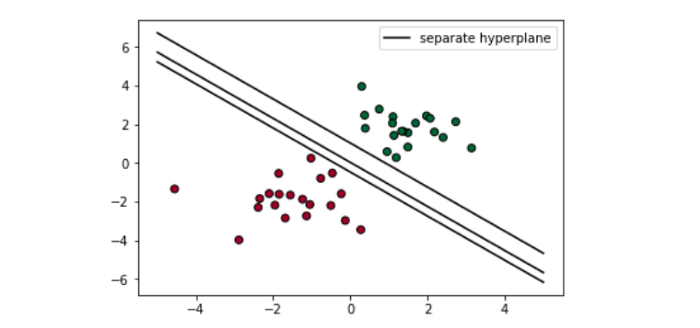

En términos generales, un hiperplano no tiene por qué necesariamente ser una recta, si no que es una *variedad de una dimensión menos del espacio que habita*:

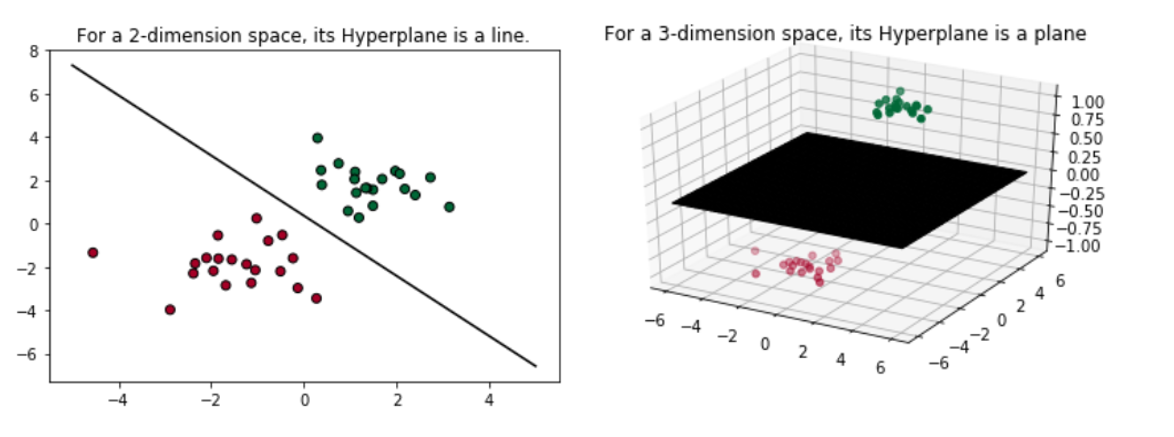

El algoritmo encuentra los coeficientes de dicho hiperplano maximizando la distancia mínima del mismo a los puntos de ambas clases. Gráficamente, lo vemos a continuación:

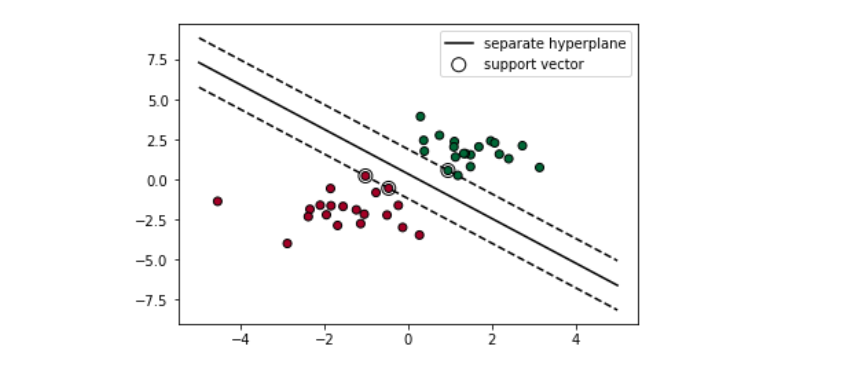

Pero, ¿qué pasa cuando nuestros datos están mezclados? Este es el escenario más habitual cuando trabajamos con *datasets* arbitrarios. Dos estrategias se pueden seguir:


*   Soft margin: Aceptar un cierto grado de tolerancia con los errores, y minimizarlos, a la vez que se encuentra el hiperplano óptimo. En este sentido, es fundamental el parámetro **grado de tolerancia** del algoritmo, denotado por *C*:



*   Kernel: Usar una función *kernel* es una técnica muy extendida para encontrar fronteras de decisión no lineales. Consiste, de forma sugestiva, en usar nuestros datos como el dominio de una función escalar, y proyectar nuestros puntos sobre la gráfica de dicha función. Los más populares son:

1.  Lineal (caso que ya conocemos)
2.  Polinomial
3.  *Radial basis function*

Dentro de éstas últimas, tenemos otro parámetro extra de penalización, *gamma*. 

Para comenzar, implementaremos a mano la versión más elemental del algoritmo (*kernel* lineal), cuya hipótesis se conoce como función de *Hinge*:

$$ h_{\theta}(x) = \left\lbrace\begin{array}{ccl}1 & \text{ si } & \theta^T x-b\geq 0\\0 & \text{ si } & \theta^T x-b< 0\end{array}\right. $$

Esta predicción se contrasta posteriormente con la función de coste

$$ J(\theta)=\frac{\lambda}{2}||\theta||^2+\left[\frac{1}{n_{samples}}\sum_{i=1}^{n_{samples}}\,\text{max}(0,1-y_i\cdot h_{\theta}(X_i))\right] $$

cuyo gradiente viene especificado por:

* Si $y_i-h_{\theta}(X_i)\geq 1$:
  * $\nabla_{\theta} J = 2\lambda\theta$.
  * $\nabla_b J=0$.
* Si $y_i-h_{\theta}(X_i)< 1$:
  * $\nabla_{\theta} J = 2\lambda\theta-X_i^T\cdot y_i$.
  * $\nabla_b J=y_i$.

Haremos una implementación manual de tal forma que sea fácilmente adaptable su extensión a detalles más complejos como el uso de *kernels*:

In [79]:
#Creamos una clase que recoja todos los métodos necesarios
class SVM():

    def __init__(self, alpha=0.001, lambda_param=0.01, epochs=1000):
        self.alpha = alpha
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.theta = None
        self.b = None

    def hinge_function(self, x):
      return np.dot(x, self.theta) - self.b

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        
        self.theta = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * self.hinge_function(x_i) >= 1
                if condition:
                    self.theta -= self.alpha * (2 * self.lambda_param * self.theta)
                    #En este caso, bien la etiqueta es cero, o bien la predicción es correcta,
                    #y puesto que el aprendizaje del bias es proporcional al valor de la etiqueta
                    #en caso erróneo, se omite por ser cero
                else:
                    self.theta -= self.alpha * (2 * self.lambda_param * self.theta - np.dot(x_i, y_[idx]))
                    self.b -= self.alpha * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.theta) - self.b
        approx[approx<0] = 0
        approx[approx>0] = 1
        return approx

In [80]:
svm = SVM()
svm.fit(X_train.values, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        54
           1       0.86      1.00      0.93        89

    accuracy                           0.90       143
   macro avg       0.93      0.87      0.89       143
weighted avg       0.92      0.90      0.90       143



Veamos ahora la implementación en **sklearn** con las técnicas de *soft margin* y *kernels* implementados:

c:\Users\User\Desktop\Data_Analytics\venv_Data_Analytics\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


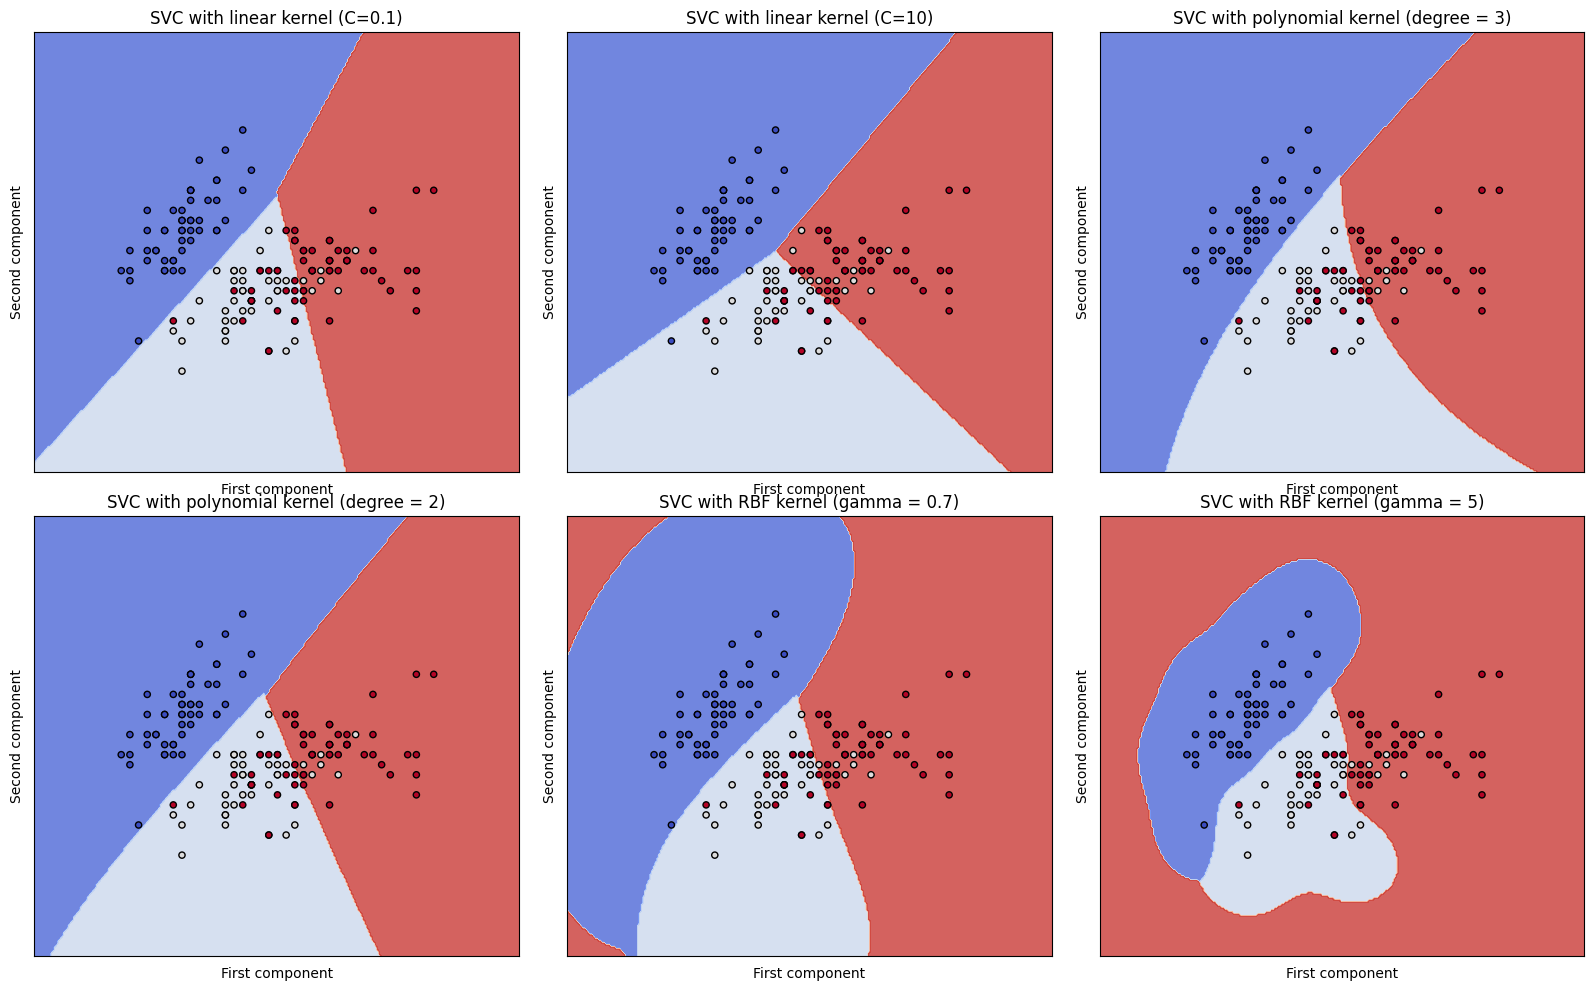

In [81]:
from sklearn import svm

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:,:2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=0.1),
          svm.LinearSVC(C= 10, max_iter=10000),
          svm.SVC(kernel='poly', degree = 3, C=C),
          svm.SVC(kernel='poly', degree = 2, C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='rbf', gamma=5, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel (C=0.1)',
          'SVC with linear kernel (C=10)',
          'SVC with polynomial kernel (degree = 3)',
          'SVC with polynomial kernel (degree = 2)',
          'SVC with RBF kernel (gamma = 0.7)',
          'SVC with RBF kernel (gamma = 5)')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2,3,figsize=(20,12))
plt.subplots_adjust(wspace=.1, hspace=.1)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('First component')
    ax.set_ylabel('Second component')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

---
## Decision trees

Los árboles de decisión son uno de los métodos más efectivos para los problemas de clasificación. Para introducirlos, necesitamos familiarizarnos con la siguiente terminología:

* Raíz: Nodo principal del que parte la primera iteración.
* Partición: Proceso de dividir un nodo *padre* en dos o más *hijos*.
* Nodo de decisión: Nodo a partir del cual se descompone el árbol.
* Nodo terminal: Nodo límite que no da lugar a más iteraciones.
* Rama: Sub-árbol del principal.

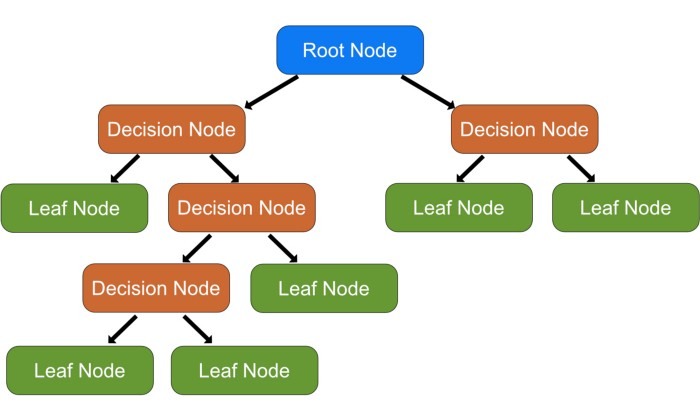

Entendemos por tanto que el núcleo fundamental de este algoritmo son los nodos, y la información inherente a ellos. Debido a esta razón, dichos objetos serán implementados en una clase independiente:

```python
class Node():
    '''
    Clase auxiliar que comprende la estructura de un nodo arbitrario.
    '''
    def __init__(self, feature=None, threshold=None, data_left=None, data_right=None, gain=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.data_left = data_left
        self.data_right = data_right
        self.gain = gain
        self.value = value
```

La cuestión ahora es, ¿qué variable forma parte del nodo raíz? De forma más general, ¿qué variable nos permite en un nodo de decisión dividir la muestra? Para responder a esta pregunta,

```python
class DecisionTree():
    '''
    Clase para desarrollar el algoritmo de árboles de decisión.
    '''
    def __init__(self, min_samples_split=2, max_depth=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None
```

se introduce el concepto de **entropía**, que intuitivamente permite obtener el **desorden** de una distribución con $c$ clases como:

$$E(s)=\sum_{i=1}^c p_i\,\text{log}_2(p_i)$$

```python
from collections import Counter #Librería necesaria

def entropy(s):
    counts = np.bincount(s)
    percentages = counts / len(s)
    
    entropy = 0
    for pct in percentages:
        if pct > 0:
            entropy -= pct * np.log2(pct)
    return entropy
```

Por otra parte, el término **information gain** hace referencia a la variación entre la entropía de un nodo de decisión y la entropía media de los nodos hijos:

$$ \text{Gain}(S,\mathcal{A})=E(s)-\frac{1}{|S|}\sum_{v\in\mathcal{A}}|S_v|E(S_v),\quad \mathcal{A}\subset \mathcal{P}(S) $$

```python
def information_gain(parent, left_child, right_child):
    num_left = len(left_child) / len(parent)
    num_right = len(right_child) / len(parent)
    
    gain = entropy(parent) - (num_left * entropy(left_child) + num_right * entropy(right_child))
    return gain
```

La forma que tenemos de encontrar la mejor forma de dividir nuestros datos es iterar recursivamente por cada variable y cada valor que tomen las mismas calculando entropías y ganancias de información:

```python
def best_split(self, X, y):
    '''
    Método auxiliar que calcula la mejor partición dadas unas ciertas variables y sus etiquetas.
    Devuelve un diccionario con las especificaciones de dicha partición.
    '''
    best_split = {}
    best_info_gain = -1
    n_rows, n_cols = X.shape
    
    # Iteramos por cada variable de los datos
    for f_idx in range(n_cols):
        X_curr = X[:, f_idx]
        # Iteramos sobre cada valor distinto de esa variable
        for threshold in np.unique(X_curr):
            # Separamos datos menores o mayores que el valor fijado
            df = np.concatenate((X, y.reshape(1, -1).T), axis=1)
            df_left = np.array([row for row in df if row[f_idx] <= threshold])
            df_right = np.array([row for row in df if row[f_idx] > threshold])

            # Si produce una división no trivial, obtenemos la etiqueta de cada
            # subconjunto y calculamos la information gain
            if len(df_left) > 0 and len(df_right) > 0:
                y = df[:, -1]
                y_left = df_left[:, -1]
                y_right = df_right[:, -1]
                gain = self.information_gain(y, y_left, y_right)

                # Actualizamos la mejor partición caso que lo sea               
                if gain > best_info_gain:
                    best_split = {
                        'feature_index': f_idx,
                        'threshold': threshold,
                        'df_left': df_left,
                        'df_right': df_right,
                        'gain': gain
                    }
                    best_info_gain = gain
    return best_split
```

Finalmente, obtenemos un método recursivo que, en base a las especificaciones dadas, construye el árbol de decisión:

```python
def build(self, X, y, depth=0):
    '''
    Método auxiliar que construye el árbol de decisión recursivamente a partir de los datos de entrada.
    Devuelve un objeto Node.
    '''
    n_rows, n_cols = X.shape
    
    # Comprueba si un nodo es terminal
    if n_rows >= self.min_samples_split and depth <= self.max_depth:
        # Obtiene la mejor división
        best = self._best_split(X, y)
        # Si la partición no es pura, construye recursivamente nodos hijos
        if best['gain'] > 0:
            left = self.build(X=best['df_left'][:, :-1], y=best['df_left'][:, -1], depth=depth + 1)
            right = self.build(X=best['df_right'][:, :-1], y=best['df_right'][:, -1], depth=depth + 1)
            return Node(feature=best['feature_index'], threshold=best['threshold'], data_left=left, data_right=right, gain=best['gain'])
    # Nodo terminal
    return Node(value=Counter(y).most_common(1)[0][0])
```

Juntando todos estos métodos, además de un método de entrenamiento que construya el árbol, y un preictor que analiza las condiciones de cada hoja para obtener la etiqueta, obtenemos nuestro clasificador:

In [82]:
#Librería necesaria
import os
import sys
import logging as log
from collections import Counter

# Setup logs
root = log.getLogger()
root.setLevel(log.DEBUG)
handler = log.StreamHandler(sys.stdout)
handler.setLevel(log.DEBUG)
formatter = log.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
root.addHandler(handler)

#Clase nodo
class Node():
    '''
    Clase auxiliar que comprende la estructura de un nodo arbitrario.
    '''
    def __init__(self, feature=None, threshold=None, data_left=None, data_right=None, gain=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.data_left = data_left
        self.data_right = data_right
        self.gain = gain
        self.value = value

#Clase árbol de decisión
class DecisionTree():
    '''
    Class which implements a decision tree classifier algorithm.
    '''
    def __init__(self, min_samples_split=2, max_depth=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None
        
    @staticmethod
    def entropy(s):
        # Convert to integers to avoid runtime errors
        counts = np.bincount(np.array(s, dtype=np.int64))
        # Probabilities of each class label
        percentages = counts / len(s)

        # Caclulate entropy
        entropy = 0
        for pct in percentages:
            if pct > 0:
                entropy += pct * np.log2(pct)
        return -entropy
    
    def information_gain(self, parent, left_child, right_child):
        num_left = len(left_child) / len(parent)
        num_right = len(right_child) / len(parent)
        return self.entropy(parent) - (num_left * self.entropy(left_child) + num_right * self.entropy(right_child))
    
    def best_split(self, X, y):
        '''
        Método auxiliar que calcula la mejor partición dadas unas ciertas variables y sus etiquetas.
        Devuelve un diccionario con las especificaciones de dicha partición.
        '''
        best_split = {}
        best_info_gain = -1
        n_rows, n_cols = X.shape
  
        # Iteramos por cada variable de los datos
        for f_idx in range(n_cols):
            X_curr = X[:, f_idx]
            # Iteramos sobre cada valor distinto de esa variable
            for threshold in np.unique(X_curr):
                # Separamos datos menores o mayores que el valor fijado
                df = np.concatenate((X, y.reshape(1, -1).T), axis=1)
                df_left = np.array([row for row in df if row[f_idx] <= threshold])
                df_right = np.array([row for row in df if row[f_idx] > threshold])

                # Si produce una división no trivial, obtenemos la etiqueta de cada
                # subconjunto y calculamos la information gain
                if len(df_left) > 0 and len(df_right) > 0:
                    y = df[:, -1]
                    y_left = df_left[:, -1]
                    y_right = df_right[:, -1]
                    gain = self.information_gain(y, y_left, y_right)

                    # Actualizamos la mejor partición caso que lo sea               
                    if gain > best_info_gain:
                        best_split = {
                            'feature_index': f_idx,
                            'threshold': threshold,
                            'df_left': df_left,
                            'df_right': df_right,
                            'gain': gain
                        }
                        best_info_gain = gain
            # Final condition if not converges
        if best_info_gain==-1:
            best_split = {
                            'feature_index': 0,
                            'threshold': np.mean(X),
                            'df_left': np.array([row for row in df if row[0] <= np.mean(X)]),
                            'df_right': np.array([row for row in df if row[0] > np.mean(X)]),
                            'gain': best_info_gain
                        }
        return best_split
    
    def build(self, X, y, depth=0):
      '''
      Método auxiliar que construye el árbol de decisión recursivamente a partir de los datos de entrada.
      Devuelve un objeto Node.
      '''
      n_rows, n_cols = X.shape
  
      # Comprueba si un nodo es terminal
      if n_rows >= self.min_samples_split and depth <= self.max_depth:
          # Obtiene la mejor división
          best = self.best_split(X, y)
          # Si la partición no es pura, construye recursivamente nodos hijos
          #if not hasattr(best, 'gain'): log.warning(f"El algoritmo no ha encontrado una partición válida en esta iteración.")
          if best['gain'] > 0:
              left = self.build(X=best['df_left'][:, :-1], y=best['df_left'][:, -1], depth=depth + 1)
              right = self.build(X=best['df_right'][:, :-1], y=best['df_right'][:, -1], depth=depth + 1)
              return Node(feature=best['feature_index'], threshold=best['threshold'], data_left=left, data_right=right, gain=best['gain'])
      # Nodo terminal
      return Node(value=Counter(y).most_common(1)[0][0])
    
    def fit(self, X, y):
        '''
        Function used to train a decision tree classifier model.
        
        :param X: np.array, features
        :param y: np.array or list, target
        :return: None
        '''
        # Call a recursive function to build the tree
        self.root = self.build(X, y)
        
    def _predict(self, x, tree):
        '''
        Helper recursive function, used to predict a single instance (tree traversal).
        
        :param x: single observation
        :param tree: built tree
        :return: float, predicted class
        '''
        # Leaf node
        if tree.value != None:
            return tree.value
        feature_value = x[tree.feature]
        
        # Go to the left
        if feature_value <= tree.threshold:
            return self._predict(x=x, tree=tree.data_left)
        
        # Go to the right
        if feature_value > tree.threshold:
            return self._predict(x=x, tree=tree.data_right)
        
    def predict(self, X):
        '''
        Function used to classify new instances.
        
        :param X: np.array, features
        :return: np.array, predicted classes
        '''
        # Call the _predict() function for every observation
        return [self._predict(x, self.root) for x in X]

Pongamos a prueba nuestra implementación:

In [83]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
DTC = DecisionTree()
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
y_pred = [int(x) for x in y_pred]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**sklearn** nos permite obtener una funcionalidad muy importante de este algoritmo: la *explicabilidad* del modelo; esto es, conocer cuáles son los criterios que usa para tomar decisiones:

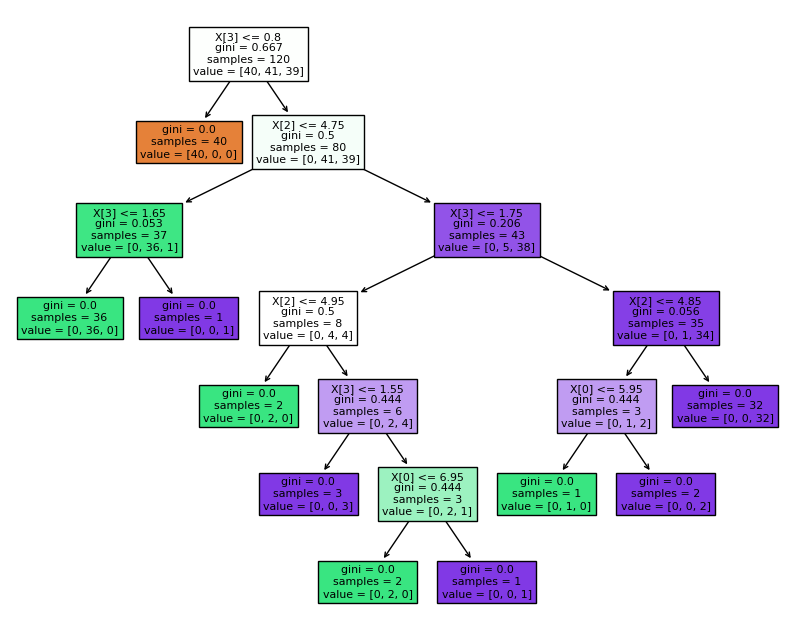

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
plt.figure(figsize = (10,8))
clf = DecisionTreeClassifier().fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.show()

---
## Random Forest

Es, sin duda, uno de los algoritmos más populares, y de los más extendidos. Forma parte de los modelos conocidos como *ensemble learning*, que mezclan diversos algoritmos para obtener un mejor resultado. Los árboles de decisión son una técnica muy poderosa, pero que es fácilmente vulnerable, y este error se puede remediar con la técnica de *ensemble learning* conocida como *bagging*, donde se crean múltiples conjuntos de entrenamiento para ser entrenados en distintos árboles.

* Buscamos que los árboles de decisión sean lo más *incorrelados* posible, ya que la esperanza de una distribución de errores perfectamente distribuída es cero.

* La cantidad de *features* que elegiremos para entrenar en cada árbol debe ser reducida para asegurar la validez del argumetno anterior.

* Finalmente, las predicciones se combinan por media (caso continuo de regresión) o moda (caso discreto de clasificación).

In [90]:
#Librería necesaria
from statistics import mode

#Algoritmo RandomForest
class RandomForest():
    def __init__(self, n_trees=50, n_features='sqrt', n_samples=.5, depth=5, min_samples_split=2):
      #Asignamos resto de parámetros
      self.n_trees = n_trees
      self.n_features = n_features
      self.n_samples = n_samples
      self.depth = depth
      self.min_samples_split = min_samples_split
    
    def fit(self, X, y):
      #Definimos la cantidad de features que queremos tomar
      if self.n_features == 'sqrt':
          self.n_features = int(np.sqrt(X.shape[1]))
      elif self.n_features == 'log2':
          self.n_features = int(np.log2(X.shape[1]))
      else:
          pass
      #Aleatorizamos elección de filas y columnas, y entrenamos
      self.idxs = [np.random.choice(np.arange(X.shape[0]), size = int(X.shape[0]*self.n_samples), replace = False) for _ in np.arange(self.n_trees)]
      self.cols = [np.random.choice(np.arange(X.shape[1]), size = self.n_features, replace = False) for _ in np.arange(self.n_trees)]
      self.DTrees = []
      for tree in np.arange(self.n_trees):
        model = DecisionTree(self.min_samples_split, self.depth)
        self.DTrees.append(model)
        self.DTrees[tree].fit(X[self.idxs[tree],:][:,self.cols[tree]],y[self.idxs[tree]])
    
    def predict(self, X):
      y_pred = np.zeros((X.shape[0], self.n_trees))
      for col in np.arange(self.n_trees):
        y_pred[:,col] = self.DTrees[col].predict(X_test[:,self.cols[col]])
      y_pred = np.apply_along_axis(mode, 1, y_pred)
      return y_pred

In [91]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
#SI QUEREMOS HACERLO CON EL DE BREAST CANCER
#Dividimos los datos en datos de entrenamiento y datos de validación
X, y = datasets.load_breast_cancer().data, datasets.load_breast_cancer().target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [95]:
RFC = RandomForest()
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        53
           1       0.92      0.98      0.95        90

    accuracy                           0.93       143
   macro avg       0.94      0.91      0.92       143
weighted avg       0.93      0.93      0.93       143



# Extra: *Receiver Operating Characteristic*

Otra visión sobre las métricas de evaluación viene dada por la curva *Receiver Operating Characteristic* (ROC). En ella, podemos observar el ratio de comparación de verdaderos positivos con falsos positivos, y a menudo el área que encierra dicha curva con el eje de abscisas se toma como una métrica de calidad de modelos, conocida como *Area Under the Curve* (AUC).

Para llevar este cómputo a cabo, precisaremos utilizar una funcionalidad de los modelos que es el método **.predict_proba()**, que nos devuelve como su nombre indica la probabilidad de que un elemento pertenezca a una determinada clase.

Veamos primero el ejemplo binario:

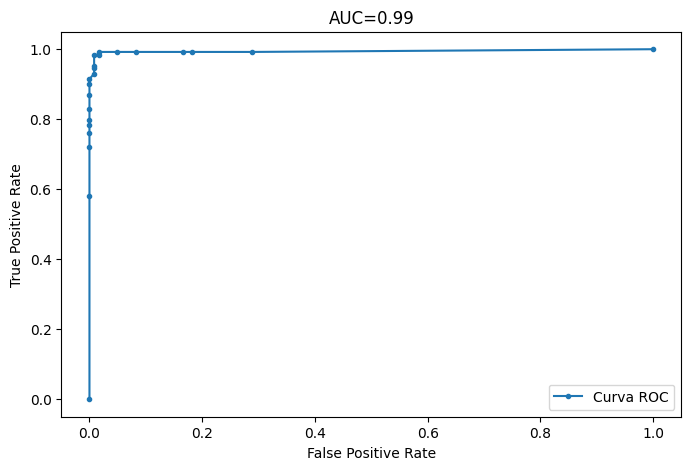

In [109]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Generamos datos
X, y = make_classification(n_samples = 1000, n_features = 5, n_classes = 2)
#Dividimos en datos de entreno y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)
#Entrenamos el modelo
model = RandomForestClassifier().fit(X_train, y_train)
#Elaboramos predicciones sobre los datos de validación
y_pred = model.predict_proba(X_test)[:,1]
#Inicializamos los vectores de probabilidades y false_positive_rate, true_positive_rate
RF_fpr, RF_tpr, _ = roc_curve(y_test, y_pred)
RF_auc = roc_auc_score(y_test, y_pred)
# Dibujamos
plt.figure(figsize=(8,5))
plt.plot(RF_fpr, RF_tpr, marker='.', label='Curva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC={auc:.2f}'.format(auc=RF_auc))
plt.legend()
plt.show()